<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Introduction</b></font>

In today's world of entertainment, movies have a big impact on how we see the world and feel. But with so many movies out there in different types, on different platforms, and in different languages, it's hard to pick a movie that we'll actually like. This can make choosing a movie frustrating and take up a lot of time.

Having lots of movies on streaming platforms is also a problem for both viewers and the platforms themselves. People find it tough to find a movie they'll enjoy in the sea of options. And the platforms miss out on making money if people don't stick around to watch more. If the recommendations aren't good, people might stop using the platform. So, it's really important for platforms to have smart movie recommendation systems. These systems help with technology and also with making money.

A Machine Learning Recommender System is a special tool that uses data to give personalized movie suggestions. This makes users happy and keeps them coming back. It also helps platforms by suggesting movies that people are more likely to watch. This way, they can show ads or promote movies more effectively. For businesses, the primary objective is to increase user engagement and maximize revenue through targeted promotions and advertisements.

For users, it's like having a friend who knows what kind of movies you like, saving you from wasting time trying out movies you won't enjoy. This is super important in the digital age when there are so many movies to choose from. The objective here is to enhance the user's experience by providing personalized, relevant, and high-quality movie recommendations that align with their preferences and watching history.

This system looks at different things to figure out what movies to suggest. It looks at your profile, like your age, gender, and what you've watched before. It also looks at the details of the movies, like the type, director, actors, reviews, and ratings. The system even checks how you behave on the platform, like what you click on and how long you watch. It also considers things like which movies are popular right now or have won awards.

What you get from this system are recommendations that match what you like and do. It also guesses how much you might like a movie. It explains why it's suggesting a movie, and if you don't like the first idea, it gives you other suggestions to try.

A Machine Learning Recommender System is like a helpful tool for both people and platforms in the world of picking movies today. By using fancy computer methods and lots of data, this system aims to elevate user satisfaction and drive business success by fine-tuning the movie discovery process.

In this article, we will delve deeper into the intricacies of a Machine Learning Recommender System designed to address the challenges outlined above. We will explore various algorithms and techniques that power these systems, such as collaborative filtering, content-based filtering, and hybrid models that blend the strengths of both approaches. Moreover, we will examine how the system incorporates additional layers of personalization through features like weighted scores, genre-specific recommendations, and real-time adaptability based on user behavior.

We will also discuss the practical implications of implementing this system. For instance, how it serves as a solution for businesses to retain customers and for users to streamline their movie selection process. Additionally, we will touch upon how the system can cater to various scenarios like group recommendations and cold starts for new users. Special attention will be paid to evaluating the performance of the system, as we look at metrics such as RMSE (Root Mean Square Error) and MAE (Mean Absolute Error) to understand the system's accuracy and reliability.

By the end of this article, the aim is to provide a comprehensive understanding of how a Machine Learning Recommender System can revolutionize the way we discover and enjoy movies. It not only makes the movie-watching experience more enjoyable for users but also serves as a powerful tool for businesses in the entertainment industry to optimize user engagement and revenue generation. So, let's embark on this journey to unravel the magic behind smart movie recommendations.

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Dataset and Features Description</b></font>

---

### Ratings Dataset (`ratings_small.csv`)

This dataset serves as the **backbone for building robust movie recommender systems**, capturing user ratings for different movies.

- **Columns**:
  - **`userId`**: Unique identifier for each user, crucial for tracking individual rating behaviors.
  - **`movieId`**: Unique identifier for each movie, linking the ratings to specific movies.
  - **`rating`**: The rating score given by the user to a movie, usually on a scale like 0.5-5 or 1-10.
  - **`timestamp`**: Records the time when the rating was given, valuable for generating time-sensitive recommendations.

---

### Movies Dataset (`movies.csv`)

A **comprehensive collection of movie metadata** that includes a variety of features ranging from the film's title and tagline to its runtime and revenue.

- **Columns**:
  - **`id`**: Unique identifier for each movie.
  - **`genres`**: Categorizes each movie into one or multiple genres.
  - **`title`**: The official title of the movie.
  - **`overview`**: A brief description or synopsis of the movie.
  - **`revenue`**: Financial earnings from box office and other sources.
  - **`vote_average`**: The average rating given by viewers.
  - **`vote_count`**: The total number of ratings the movie has received.
  - **other**

---

### Keywords Dataset (`keywords.csv`)

This dataset **enriches the movies with a list of key phrases and words** that contains a list of words or phrases that summarize the themes or unique features of each movies. These keywords can serve quick references to understand the main topic of the movies, plot elements, or unique feature of each movies.

- **Columns**:
  - **`id`**: Unique identifier that links back to the movies dataset.
  - **`keywords`**: A collection of words or phrases summarizing the movie's essence, used for content-based filtering and search features.
  
---

### Credits Dataset (`credits.csv`)

Holds **detailed information about the cast and crew** involved in each movie, providing an in-depth look at the people behind the production.

- **Columns**:
  - **`id`**: Unique identifier that can be used to merge with the movies dataset.
  - **`cast`**: Lists the actors and their roles, valuable for actor-based recommendations.
  - **`crew`**: Specifies the personnel involved in various aspects of production, such as directing and writing, useful for director- or writer-based recommendations.

---


<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Data Preprocessing</b></font>

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Utilities
from ast import literal_eval
from collections import Counter
import datetime
import pickle

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Surprise Library
from surprise import (Reader, Dataset, SVD, SVDpp, KNNBasic, NMF, CoClustering, SlopeOne,
                      NormalPredictor, KNNBaseline, KNNWithMeans, KNNWithZScore, BaselineOnly,
                      accuracy, accuracy)
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [3]:
#Read Data Set
movies_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/movies_metadata.csv")
keywords_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/keywords.csv")
credits_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/credits.csv")
ratings_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/ratings_small.csv")

C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_18408\317922346.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/movies_metadata.csv")


#### 3.1 Merge DataFrames for Comprehensive Data

In this step, our aim is to create a unified DataFrame that encapsulates all the relevant information we have. To achieve this, we'll perform the following actions:

1. **Base DataFrame**: Start with `movies_df`, which contains core details about each movie.
2. **Additional Data**: Use `keywords_df` and `credits_df` to supplement this information.
3. **Merging Criteria**: Link these DataFrames using the unique movie IDs as the common key.

By merging these DataFrames, we'll establish a more holistic dataset, facilitating a richer analysis and more accurate modeling in subsequent steps.


In [4]:
movies_df = movies_df[~(movies_df['id'].str.contains('-'))]
movies_df['id'] = movies_df['id'].astype('int64')
movies_df = pd.merge(movies_df, keywords_df, on='id', how='left')
movies_df = pd.merge(movies_df, credits_df, on='id', how='left')

In [5]:
del keywords_df
del credits_df

#### 3.2 Handle Missing Values

After merging the data, the next crucial step is to deal with missing values. Handling these correctly ensures that our analysis and models are accurate and reliable.


In [6]:
# Checking for Missing Values
movies_df.isnull().sum()

adult                        0
belongs_to_collection    42055
budget                       0
genres                       0
homepage                 38620
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25846
title                        4
video                        4
vote_average                 4
vote_count                   4
keywords                     1
cast                         1
crew                         1
dtype: int64

To ensure the quality of our recommendation model, it's essential to handle missing values effectively. Here's our strategy:

1. **Drop Unnecessary Columns**: Certain columns, like `'belongs_to_collection'`, `'homepage'`, `'imdb_id'`, `'poster_path'`, `'status'`, and `'video'`, don't provide useful information for our model. We remove them.
    
2. **Handle Text-Based Columns**: Some columns contain text data, such as `'tagline'`, `'original_language'`, and `'keywords'`. Missing values in these columns are replaced with an empty string.
3. **Handle Numerical Columns**: For numerical columns like `'runtime'`, we replace missing values with 0 to avoid skewing our analysis.

By following these steps, we clean our dataset and make it ready for building a robust recommendation model.


In [7]:
# Drop the specified columns
column_to_drop = ['belongs_to_collection', 'homepage', 'status', 'video']
movies_df = movies_df.drop(column_to_drop, axis=1)

# Replace missing values in text columns with 'Unknown'
text_columns = ['original_language','tagline']
movies_df[text_columns] = movies_df[text_columns].fillna('')

# Replace missing value in number column with 0
number_columns = ['runtime']
movies_df[number_columns] = movies_df[number_columns].fillna(0)

# Drop the missing value rows
movies_df.dropna(inplace=True)
movies_df.head()


,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


#### 3.3 Data Transformation
We undertook several data formatting steps to prepare our dataset for analysis. This included converting the `'release_date'` column into a datetime format and extracting the year into a new `'year'` column. The `'year'` column was then standardized as an integer. Additionally, we ensured the `'popularity'` column was in a float format for numerical operations, and the `'timestamp'` column in `ratings_df` was transformed from a Unix timestamp to a standard datetime format.

In [8]:
# Convert the 'release_date' column to datetime format and extract the year into a new 'year' column
# If the conversion fails, errors are coerced to NaT (Not a Timestamp)
movies_df['year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year

# Convert the 'year' column to integer type, this will convert NaT to its integer representation
movies_df['year'] = movies_df['year'].astype(int)

# Convert the 'release_date' column to datetime format again to standardize its format
# If the conversion fails, errors are coerced to NaT
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format="%Y-%m-%d", errors='coerce')

# Convert the 'popularity' column to float64 type to ensure numerical operations can be performed
movies_df['popularity'] = movies_df['popularity'].astype('float64')

# Convert the 'timestamp' column in ratings_df to datetime format using Unix timestamp
# The lambda function converts each timestamp to a datetime object
ratings_df['timestamp'] = ratings_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))


In the data preparation phase, transforming certain columns is often necessary for easier analysis and feature engineering. Columns such as `'genres'`, `'keywords'`, `'cast'`, and `'crew'` contain complex or text-based data that may not be immediately useful in their current form.

1. **List Transformation**: These columns are transformed into lists of elements using Python's `literal_eval` function. This allows us to extract essential information from these text-based fields.
  
2. **Director Extraction**: From the `'crew'` column, we specifically extract the director's name for each movie as it can be a significant feature for recommendations.
  
3. **Top Elements**: For columns like `'genres'` and `'keywords'`, we limit the data to the top 3 elements if more than 3 elements are present. This helps in reducing dimensionality.
  
4. **Data Cleaning**: We also clean the text data by converting everything to lower case and removing spaces. This ensures uniformity in text-based features.
  
5. **Bag of Words**: Finally, a 'bag_of_words' column is created by concatenating relevant features. This will serve as a composite feature for our recommendation engine.

These transformations make the dataset more manageable and ready for model development and suitable formats for easier analysis and feature engineering.

In [9]:
# Function to extract values from a column in a DataFrame and extend a target list with these values
def extend_list_from_column(df, column_name, target_list, key='name'):
    # Replace NaN with empty lists and apply literal_eval
    # Then extract values using key and extend the target list
    temp_df = df[column_name].fillna('[]').apply(literal_eval).apply(lambda x: [i[key] for i in x] if isinstance(x, list) else [])
    for i in temp_df:
        if i:
            target_list.extend(i)

# Function to get the director's name from the 'crew' column
def get_director(x):
    return next((i['name'] for i in x if i['job'] == 'Director'), np.nan)

# Function to get the list of top 3 elements or the entire list, whichever is more
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names[:3] if len(names) > 3 else names
    return []

# Function to clean data: Convert strings to lower case and remove spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

# Function to create a bag of words from various columns
def create_bag_of_words(x):
    return ' '.join(x['keywords'] + x['cast'] + [x['director']] + x['genres'])

# Initialize empty lists for storing specific types of data
spoken_languages_list = []
cast_list = []
crew_list = []
company_list = []
country_list = []
original_language_list = []

# Extend the original_language_list from the 'original_language' column
for i in movies_df['original_language']:
    original_language_list.extend(i.split(', '))

# Use the extend_list_from_column function to populate the initialized lists
extend_list_from_column(movies_df, 'spoken_languages', spoken_languages_list)
extend_list_from_column(movies_df, 'cast', cast_list, key='character')
extend_list_from_column(movies_df, 'crew', crew_list)
extend_list_from_column(movies_df, 'production_companies', company_list)
extend_list_from_column(movies_df, 'production_countries', country_list)

# Fill NaN values and apply literal_eval to specific columns
for col in ['crew', 'cast', 'genres', 'keywords', 'production_companies']:
    movies_df[col] = movies_df[col].fillna('[]').apply(literal_eval)

# Apply the get_director function to extract directors from the 'crew' column
movies_df['director'] = movies_df['crew'].apply(get_director)

# Apply the get_list function to truncate or keep entire lists in specific columns
for col in ['cast', 'genres', 'keywords', 'production_companies']:
    movies_df[col] = movies_df[col].apply(get_list)
    
# Apply the clean_data function to sanitize feature columns
features = ['adult', 'cast', 'keywords', 'director', 'genres', 'production_companies']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)
    
# Create a 'bag_of_words' column by concatenating relevant columns
movies_df['bag_of_words'] = movies_df.apply(create_bag_of_words, axis=1)


Before proceeding with the recommendation tasks, it's crucial to ensure that the movie IDs in both the `movies_df` and `ratings_df` are the same. This will help in avoiding any mismatches or errors during the recommendation process.

The following code snippet accomplishes this by:

1. Extracting the unique movie IDs from both `movies_df` and `ratings_df`.
2. Finding the intersection of these sets to get IDs present in both dataframes.
3. Filtering `movies_df` and `ratings_df` to only include these common IDs.


In [56]:
# # First, get the unique movie IDs from both dataframes
# unique_movie_ids_movies_df = set(movies_df['id'])
# unique_movie_ids_ratings_df = set(ratings_df['movieId'])

# # Now find the intersection of these sets to get the IDs present in both dataframes
# common_movie_ids = unique_movie_ids_movies_df.intersection(unique_movie_ids_ratings_df)

# # Filter movies_df and ratings_df to only include these common IDs
# movies_df = movies_df[movies_df['id'].isin(common_movie_ids)]
# ratings_df = ratings_df[ratings_df['movieId'].isin(common_movie_ids)]

<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4. Exploratory Data Analysis (EDA)</b></font>

#### 4.1 Distribution of Movie Release Year
To get a better understanding of the distribution of movies over the years, we plot a histogram based on the `'release_date'` column. This plot provides insights into the concentration of movie releases over the years and can be useful for further analyses.

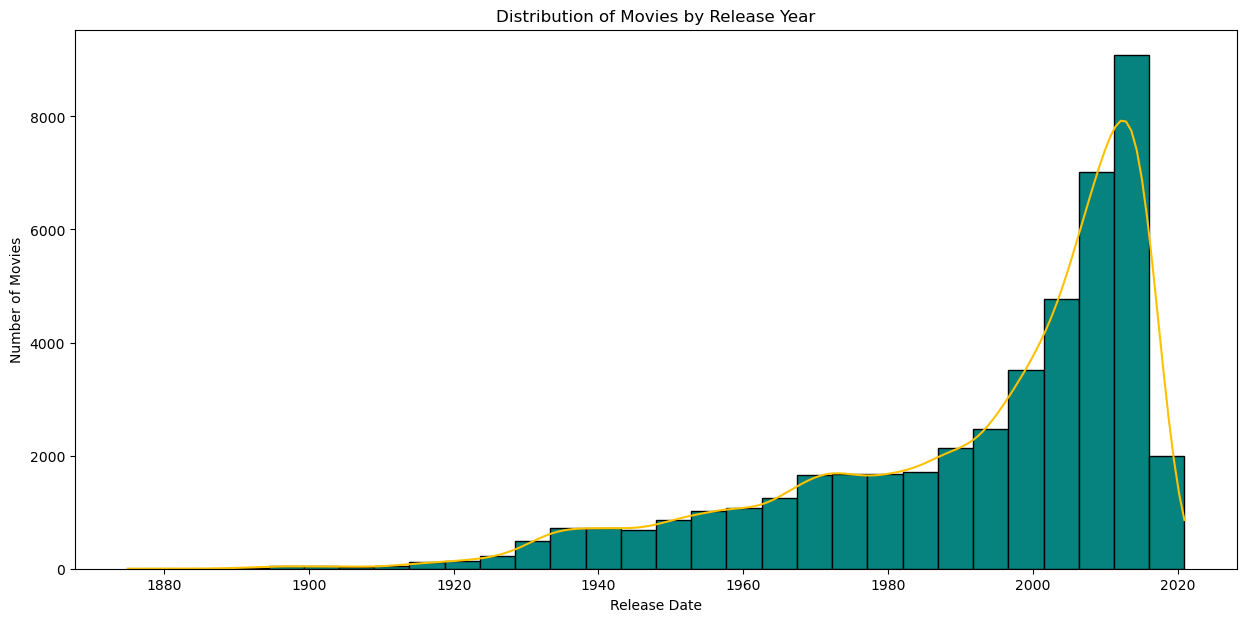

In [57]:
# 1. Plotting the histogram for movie release years
plt.figure(figsize=(15, 7))
sns.histplot(data=movies_df, x='release_date', bins=30, color='#fdc100', facecolor='#06837f', kde=True)
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.show()


Insight :
1. Growth over time : From just one movie in 1874 to nearly 2,000 in peak years, the film industry has seen exponential growth, highlighting its enduring appeal.
2. Anomaly in 2020 : The sharp decline in movie releases in 2020 likely reflects the global impact of the COVID-19 pandemic on the industry.
3. Boom by 1985: By 1985, the industry had matured significantly, with annual releases reaching up to 373, indicating a period of rapid expansion.


#### 4.2 Top Genres of Movies

In this section, we identify and visualize in our dataset of the top 5 movie genres. We use a bar plot to display top 5 with the most occurrences genres and a pie chart to show their percentage distribution all genres.

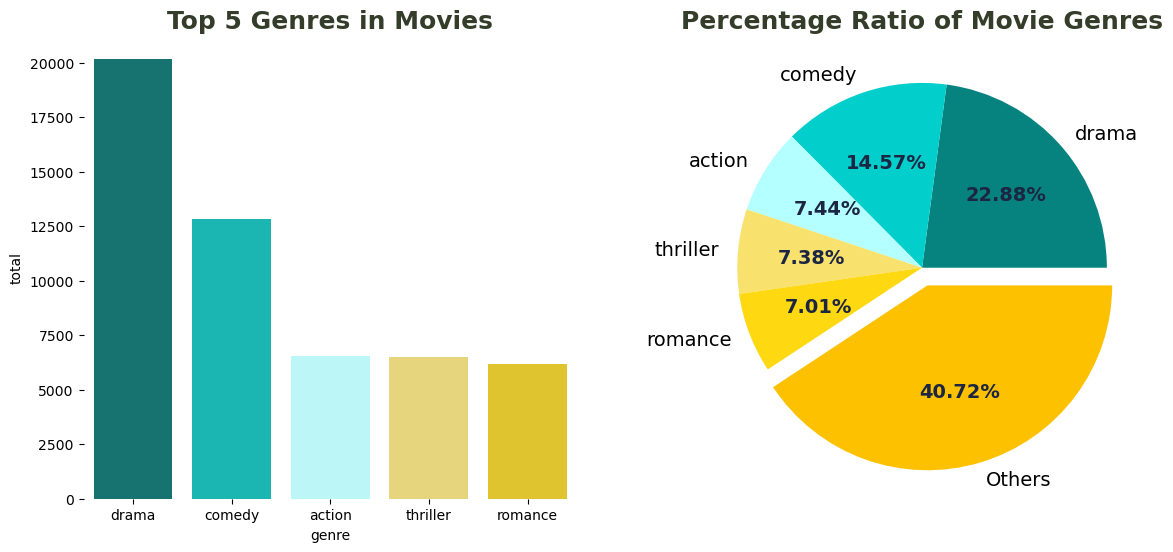

In [58]:
# 2. Top 5 Genre of Movies
# Flatten genres and count occurrences
genres_count = movies_df['genres']
genres_count = genres_count.apply(lambda x: ', '.join(x))
genres_count = Counter(', '.join(genres_count).split(', '))
df_top5 = pd.DataFrame(genres_count.most_common(5), columns=['genre', 'total'])

# Create the bar plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df_top5, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
axes[0].set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')

# Create a DataFrame for all genres
df_all = pd.DataFrame(list(genres_count.items()), columns=['genre', 'total']).sort_values('total', ascending=False)

# Add 'Others' to top 5 DataFrame
df_top5.loc[len(df_top5)] = {'genre': 'Others', 'total': df_all[5:].total.sum()}

# Create the pie chart
wedges, texts, autotexts = axes[1].pie(df_top5['total'], labels=df_top5['genre'], autopct='%.2f%%',
                                       textprops={'fontsize': 14}, explode=[0, 0, 0, 0, 0, 0.1],
                                       colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])
axes[1].set_title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')

# Style the pie chart labels
for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

sns.despine(left=True, bottom=True)
axes[1].axis('off')

plt.show()


Insight :
Total count of movie from this data shown that drama movies are the most common, followed by comedies that bring laughter. Thrillers offer excitement, romance films tell love stories, and action movies provide adventure. The "Others" category covers different genres, giving a wide variety of movie options. This insight highlights the diversity of choices for different preferences in movies.

#### 4.3 Top  5 of Spoken Languages, Actors, Crews, Production Companies, and Production Countries
In this section will show the top 5 spoken languages, original languages, actors, crew members, production companies, and production countries in our movie dataset. Each subplot uses horizontal lines and scatter points to represent the frequency of each category.

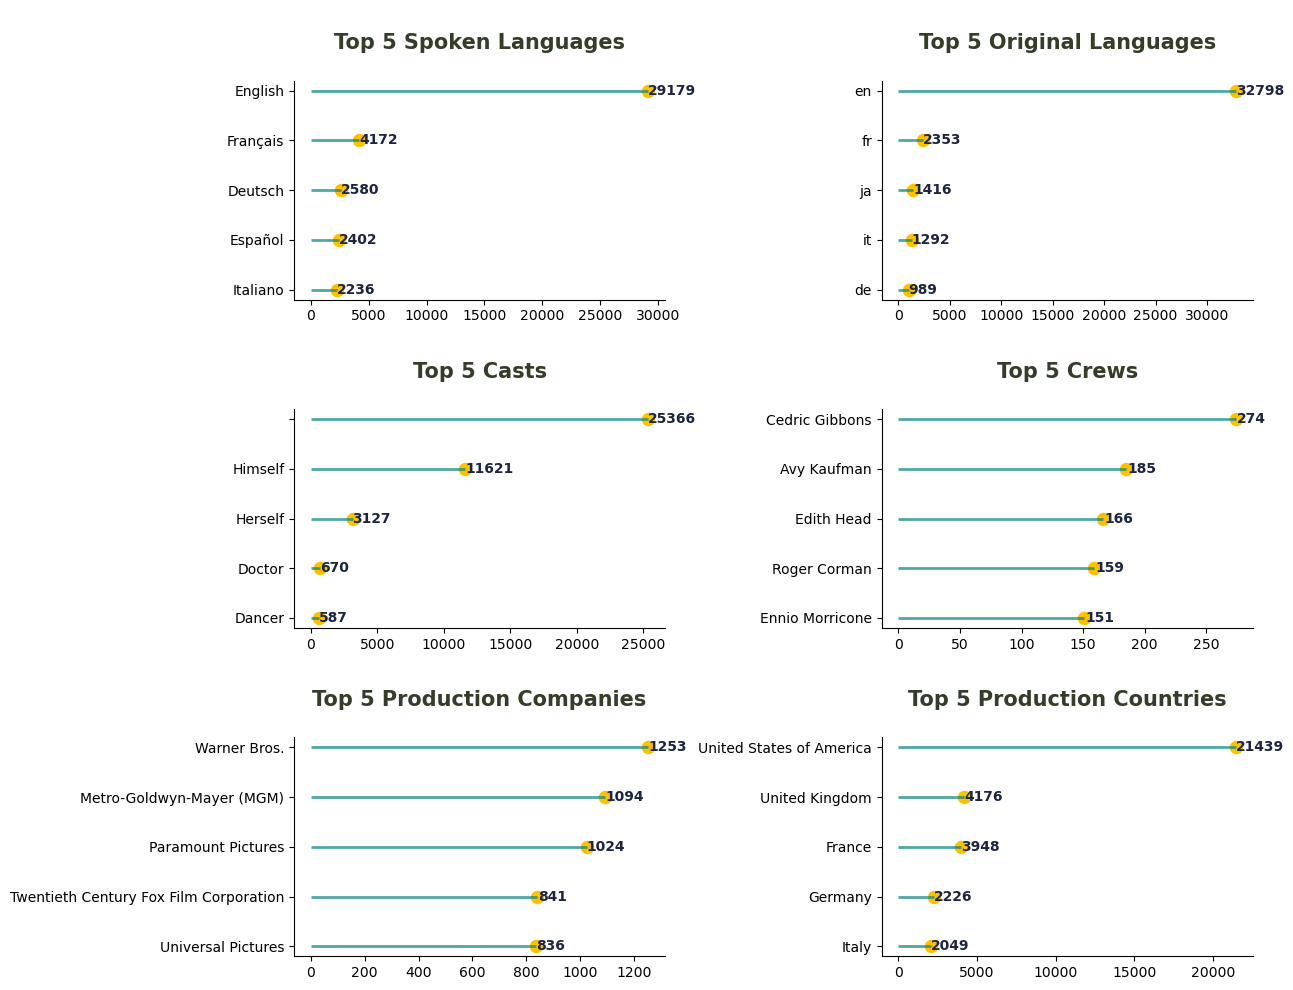

In [12]:
def plot_data_on_axes(ax, data_list, title, xlabel, buffer=10):
    df_plot = pd.DataFrame(Counter(data_list).most_common(5), columns=[xlabel, 'total']).sort_values(by='total', ascending=True)
    ax.hlines(y=df_plot[xlabel], xmin=0, xmax=df_plot['total'], color='#06837f', alpha=0.7, linewidth=2)
    ax.scatter(x=df_plot['total'], y=df_plot[xlabel], s=75, color='#fdc100')
    ax.set_title(f'\nTop 5 {title}\n', fontsize=15, weight=600, color='#333d29')
    for i, value in enumerate(df_plot['total']):
        ax.text(value+buffer, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    return df_plot

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 10))

spoken_languages_df = plot_data_on_axes(axes[0,0], spoken_languages_list, 'Spoken Languages', 'language', 1)
original_language_df = plot_data_on_axes(axes[0,1], original_language_list, 'Original Languages', 'language', 1)
cast_df = plot_data_on_axes(axes[1,0], cast_list, 'Casts', 'name', 1)
crew_df = plot_data_on_axes(axes[1,1], crew_list, 'Crews', 'name', 1)
company_df = plot_data_on_axes(axes[2,0], company_list, 'Production Companies', 'name', 1)
country_df = plot_data_on_axes(axes[2,1], country_list, 'Production Countries', 'name', 1)

sns.despine()
plt.tight_layout()
plt.show()


Insight :

The dataset reveals that English is the dominant language, both spoken and original, in the movies, emphasizing its global influence in the film industry. Notably, the United States is the leading country in film production, followed by the United Kingdom and France. Warner Bros. stands out as the top production company. The frequent appearance of roles like "Himself" and "Herself" suggests a significant number of documentaries or biographies. Key figures like Cedric Gibbons and Avy Kaufman appear to be highly involved in film production. This dataset provides a snapshot of the significant trends in languages, production houses, and roles in the movie industry.


#### 4.4 Distribution of Ratings
In this section, we visualize the distribution of user ratings using a histogram and calculate the mean and median ratings. The histogram provides insights into how often each rating is given, while the mean and median offer a central tendency measure of the ratings.

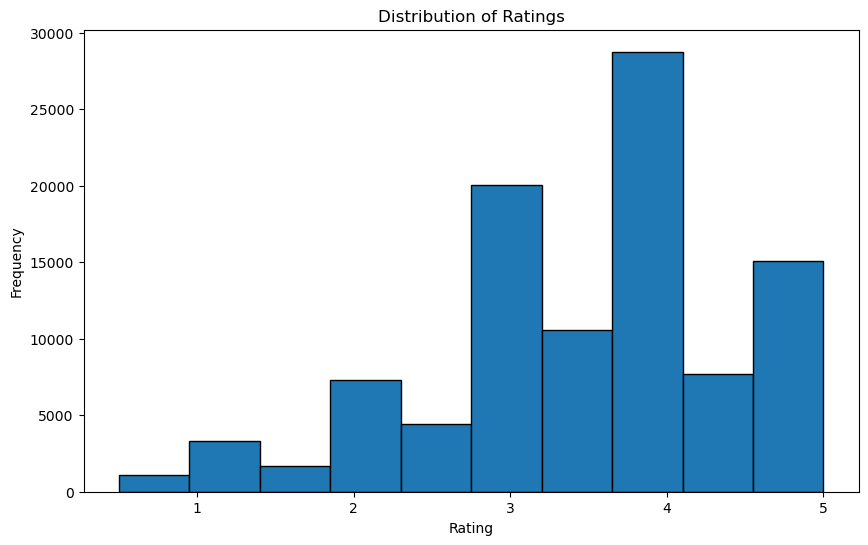

Mean Rating: 3.543608255669773
Median Rating: 4.0


In [13]:
# 4. Distribution of Ratings
# Plot histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and median ratings
mean_rating = ratings_df['rating'].mean()
median_rating = ratings_df['rating'].median()

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")


The distribution of movie ratings in the dataset appears to be skewed towards higher values, as evidenced by a median rating of 4.0, which is notably higher than the mean rating of 3.54. This suggests that users are generally inclined to give positive ratings. The higher median relative to the mean could indicate that while most users give higher ratings, there are enough low ratings to pull the mean down but not significantly affect the median. This insight could be valuable for platforms aiming to understand user satisfaction and improve the quality of recommendations.

<a id="5"></a>
<font color="darkslateblue" size=+2.5><b>5. Model Exploration</b></font>

### 5.1 Baseline Models

In our recommender system, we will consider the following five simple baseline models to provide foundational insights. These will serve as the baseline performance metrics that any subsequent machine learning models aim to beat.

#### 1. Global Mean Rating
This model predicts the global mean rating for all user-item pairs, serving as the most basic form of recommendation.

#### 2. User Mean Rating
For this model, the mean rating of each user is calculated and used to predict ratings for all items the user has not yet interacted with.

#### 3. Item Mean Rating
In contrast to the User Mean Rating, this model focuses on the mean rating of each item and uses it to predict ratings for all users.

#### 4. User-Item Mean Rating
This model takes a more nuanced approach by predicting a rating for a user-item pair as the average of the user's mean rating and the item's mean rating. The formula is :

$$
\text{Prediction} = \frac{\text{User Mean Rating} + \text{Item Mean Rating}}{2}
$$

#### 5. Weighted Mean Ratings
This model employs a weighted average of the user mean and item mean ratings. The weight \( w \) can be adjusted based on domain understanding. The formula is :

$$
\text{Prediction} = w \times \text{User Mean Rating} + (1 - w) \times \text{Item Mean Rating}, \quad \text{where } 0 \leq w \leq 1
$$


In [14]:
# Split the data into training and testing sets (75% training, 25% testing)
train_df, test_df = train_test_split(ratings_df, test_size=0.25, random_state=42)

In [15]:
from math import sqrt

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MSE
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

from sklearn.model_selection import train_test_split

# Calculate the global mean rating using the training set
global_mean_rating = train_df['rating'].mean()

# Predict global mean rating for the test set
test_df['global_mean_rating'] = global_mean_rating

# Calculate user and item mean ratings using the training set
user_mean_ratings = train_df.groupby('userId')['rating'].mean().reset_index()
item_mean_ratings = train_df.groupby('movieId')['rating'].mean().reset_index()

# Merge the mean ratings with the test set
test_df = pd.merge(test_df, user_mean_ratings, on='userId', how='left').rename(columns={'rating_y': 'user_mean_rating', 'rating_x': 'rating'})
test_df = pd.merge(test_df, item_mean_ratings, on='movieId', how='left').rename(columns={'rating_y': 'item_mean_rating', 'rating_x': 'rating'})

# Fill NAs with global mean rating
test_df['user_mean_rating'].fillna(global_mean_rating, inplace=True)
test_df['item_mean_rating'].fillna(global_mean_rating, inplace=True)

# Calculate User-Item Mean Rating
test_df['user_item_mean_rating'] = (test_df['user_mean_rating'] + test_df['item_mean_rating']) / 2

##########################################################################################################
# Calculate Weighted Mean Ratings
# Initialize variables to store the best RMSE and corresponding weight
best_rmse = float('inf')
best_w = 0

# Loop through possible weights with a step of 0.1
for w in [i * 0.1 for i in range(11)]:
    test_df['weighted_mean_rating_tmp'] = w * test_df['user_mean_rating'] + (1 - w) * test_df['item_mean_rating']
    rmse = calculate_rmse(test_df['rating'], test_df['weighted_mean_rating_tmp'])
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_w = w

# Use the best weight to calculate the final weighted mean ratings
test_df['weighted_mean_rating'] = best_w * test_df['user_mean_rating'] + (1 - best_w) * test_df['item_mean_rating']
        
##########################################################################################################
# Constant Model with rating 2.5 for all user-item pairs
test_df['constant_rating'] = 2.5

# Calculate user mean ratings and number of ratings per user
user_stats = train_df.groupby('userId')['rating'].agg(['mean', 'count']).reset_index()

# Damping factor (you can adjust this)
damping_factor = 0.2

# Predict damped user-mean rating for the test set
test_df = test_df.merge(user_stats, on='userId', how='left')
test_df['damped_user_mean_rating'] = ((1 - damping_factor) * test_df['mean']) + (damping_factor * global_mean_rating)

# Calculate RMSE for the damped user-mean model
rmse_damped_user_mean = calculate_rmse(test_df['rating'], test_df['damped_user_mean_rating'])

# Calculate RMSE for global mean, user mean, and item mean models
rmse_global_mean = calculate_rmse(test_df['rating'], test_df['global_mean_rating'])
rmse_user_mean = calculate_rmse(test_df['rating'], test_df['user_mean_rating'])
rmse_item_mean = calculate_rmse(test_df['rating'], test_df['item_mean_rating'])
rmse_user_item_mean = calculate_rmse(test_df['rating'], test_df['user_item_mean_rating'])
rmse_weighted_mean = calculate_rmse(test_df['rating'], test_df['weighted_mean_rating'])
rmse_constant = calculate_rmse(test_df['rating'], test_df['constant_rating'])
rmse_damped_user_mean = calculate_rmse(test_df['rating'], test_df['damped_user_mean_rating'])

# Display the RMSE and MSE scores for all models
print(f"RMSE for Global Mean Rating Model: {rmse_global_mean:.2f}")
print(f"RMSE for User Mean Rating Model: {rmse_user_mean:.2f}")
print(f"RMSE for Item Mean Rating Model: {rmse_item_mean:.2f}")
print(f"RMSE for User-Item Mean Rating Model: {rmse_user_item_mean:.2f}")
print(f"RMSE for Weighted Mean Rating Model: {best_rmse:.2f}, with setting the best weight is {best_w:.2f}")
print(f"RMSE for Constant Model: {rmse_constant:.2f}")
print(f"RMSE for Damped User-Mean Rating Model: {rmse_damped_user_mean:.2f}")

RMSE for Global Mean Rating Model: 1.06
RMSE for User Mean Rating Model: 0.96
RMSE for Item Mean Rating Model: 1.00
RMSE for User-Item Mean Rating Model: 0.92
RMSE for Weighted Mean Rating Model: 0.92, with setting the best weight is 0.60
RMSE for Constant Model: 1.49
RMSE for Damped User-Mean Rating Model: 0.96


In simple terms, when building a movie recommendation system, it's important to start with basic models to understand how well we're doing. Our tests show that the best simple model combines both the average ratings of users and the average ratings of movies, scoring an RMSE of 0.92. This score tells us how close the model's predictions are to the actual ratings. The lower the score, the better the model. Models that look at only the user or only the movie also do well but not as good as when combining both. The worst model is one that always predicts the same rating, no matter the user or movie, with an RMSE of 1.49. These basic models give us a starting point. Any new, more complicated model should aim to get a lower RMSE than 0.92 to be considered better.

There are several reasons why out baseline models must be explore with machine learning recomender system because our baseline models like mean-based models are not personalized to individual user behavior, while machine learning models like collaborative filtering or hybrid models can offer more personalized recommendations.

### 5.2 Collaborative Filtering

In this section, we will construct a collaborative filtering recommender system using the Surprise library. Our goal is to compare the performance of various collaborative filtering algorithms to identify the one that delivers the highest prediction accuracy, as quantified by the Root Mean Square Error (RMSE).
The code considers three algorithms for comparison:
* SVD (Singular Value Decomposition)
* KNNWithZScore (K-Nearest Neighbors with Z-Score normalization)
* SVDpp (SVD with Power Iteration)

These three collaborative filtering algorithms will be optimized using the GridSearchCV method to fine-tune their hyperparameters through 3-fold cross-validation. The objective is to identify the best-performing model by evaluating and comparing their Root Mean Square Error (RMSE) scores.

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson sim

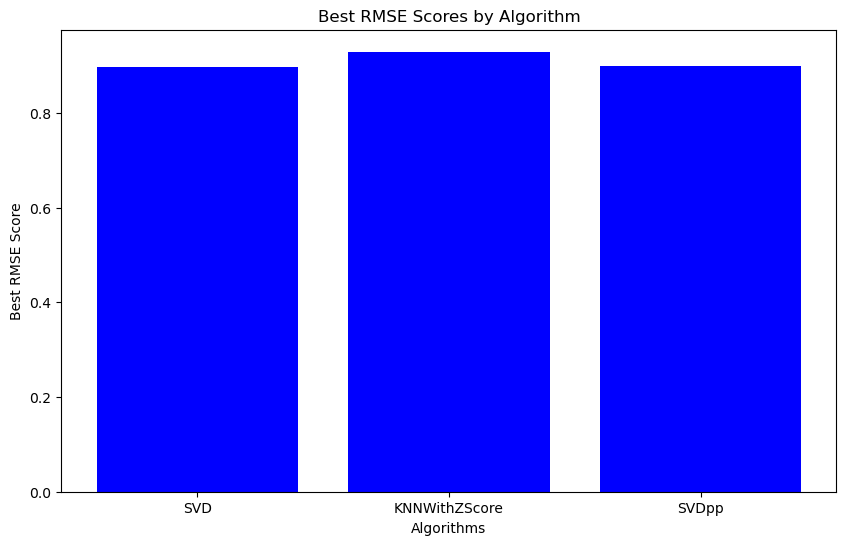

Best Model for SVD:
Best Parameters for SVD:
 {'n_factors': 150, 'n_epochs': 35, 'lr_all': 0.012, 'reg_all': 0.15}
Best RMSE score for SVD:
 0.8970635747677034
Best Model for KNNWithZScore:
Best Parameters for KNNWithZScore:
 {'k': 45, 'min_k': 3, 'sim_options': {'name': 'msd', 'user_based': True}}
Best RMSE score for KNNWithZScore:
 0.9292590202281338
Best Model for SVDpp:
Best Parameters for SVDpp:
 {'n_factors': 140, 'n_epochs': 25, 'lr_all': 0.011, 'reg_all': 0.18}
Best RMSE score for SVDpp:
 0.8981174186929323


In [17]:
# Create a Reader object specifying the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data into the Surprise Dataset
train_data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
test_data = Dataset.load_from_df(test_df[['userId', 'movieId', 'rating']], reader)

# Build the trainset and testset
trainset = train_data.build_full_trainset()
testset = test_data.build_full_trainset().build_testset()

# List of algorithms
algorithms = [SVD, KNNWithZScore, SVDpp]

# Parameters for Grid Search
param_grid = {
    SVD: {
        'n_factors': [125, 150, 175],
        'n_epochs': [25, 30, 35],
        'lr_all': [0.008, 0.01, 0.012],
        'reg_all': [0.15, 0.2, 0.25]
    },
    KNNWithZScore: {
        'k': [35, 40, 45],
        'min_k': [1, 3, 5, 7],
        'sim_options': {
            'name': ['msd', 'cosine', 'pearson'],
            'user_based': [True, False]
        }
    },
    SVDpp: {
        'n_factors': [20, 50, 100, 140, 150, 160],
        'n_epochs': [20, 25],
        'lr_all': [0.001, 0.002, 0.005, 0.009, 0.01, 0.011],
        'reg_all': [0.18, 0.2, 0.22, 0.4, 0.6, 0.8]
    }
}

best_models = {}
best_params = {}
best_rmse_scores = {}

# Perform GridSearchCV for each algorithm
for algo in algorithms:
    gs = GridSearchCV(algo, param_grid[algo], measures=['rmse'], cv=3)
    gs.fit(train_data)
    
    # Get the best model, best parameters, and best RMSE score
    best_models[algo.__name__] = gs.best_estimator['rmse']
    best_params[algo.__name__] = gs.best_params['rmse']
    best_rmse_scores[algo.__name__] = gs.best_score['rmse']

# Visualize the RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(best_rmse_scores.keys(), best_rmse_scores.values(), color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Best RMSE Score')
plt.title('Best RMSE Scores by Algorithm')
plt.show()

# Print the best model, best parameters, and best RMSE score
for algo_name, model in best_models.items():
    print(f"Best Model for {algo_name}:\n", model)
    print(f"Best Parameters for {algo_name}:\n", best_params[algo_name])
    print(f"Best RMSE score for {algo_name}:\n", best_rmse_scores[algo_name])


In [18]:
# Determine the best algorithm based on the lowest RMSE score
best_algo = min(best_rmse_scores, key=best_rmse_scores.get)

# Print the best algorithm, best parameters, and best RMSE score
print(f"Best Algorithm: {best_algo}")
print(f"Best Parameters: {best_params[best_algo]}")
print(f"Best RMSE score: {best_rmse_scores[best_algo]}")


Best Algorithm: SVD
Best Parameters: {'n_factors': 150, 'n_epochs': 35, 'lr_all': 0.012, 'reg_all': 0.15}
Best RMSE score: 0.8970635747677034


## Results and Conclusion

Upon executing the code, we yielded insightful results for our trio of collaborative filtering algorithms—SVD, KNNWithZScore, and SVDpp. Here's a snapshot of the Root Mean Square Error (RMSE) scores for each:

- **SVD**: Achieved an RMSE score of `0.897`
- **KNNWithZScore**: Registered an RMSE score of `0.929`
- **SVDpp**: Posted an RMSE score of `0.898`

Among the algorithms tested, SVD outperformed the others with the lowest RMSE score of `0.897`, signifying it as the most reliable model for our movie recommendation system. The optimum settings for this model were as follows: 
$$
(n_{\text{factors}} = 150),
(n_{\text{epochs}} = 35),
(lr_{\text{all}} = 0.012),
and (reg_{\text{all}} = 0.15).
$$
In conclusion, SVD stands as the algorithm of choice for achieving the highest prediction accuracy in our project. Future endeavors could involve deploying this optimized model into a live environment or investigating further avenues to refine its predictive capability. After identifying the best-performing algorithm, the following steps are essential for making predictions on the test data and evaluating the model's accuracy.

In [24]:
# Predict ratings for the testset
best_algo_name = min(best_rmse_scores, key=best_rmse_scores.get)
best_algo_model = best_models[best_algo_name]

# Save the best model using pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_algo_model, f)

print("Best model saved to 'best_model.pkl'")

# Train the best algorithm on the entire training set
best_algo_model.fit(trainset)
    
predictions = best_algo_model.test(testset)

# Calculate RMSE for the predictions
rmse_score = accuracy.rmse(predictions)

# Calculate other accuracy measures
mae_score = accuracy.mae(predictions)
fcp_score = accuracy.fcp(predictions)

print(f"Evaluation Metrics:")
print(f"RMSE score: {rmse_score}")
print(f"MAE score: {mae_score}")
print(f"FCP score: {fcp_score}")

# Save the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)
predictions_df = predictions_df.rename(columns={'uid': 'userId', 'iid': 'movieId', 'r_ui': 'actual', 'est': 'predicted'})
predictions_df['error'] = np.abs(predictions_df['actual'] - predictions_df['predicted'])

# Save DataFrame to CSV file
predictions_df.to_csv('predictions.csv', index=False)


Best model saved to 'best_model.pkl'
RMSE: 0.8848
MAE:  0.6813
FCP:  0.6597
Evaluation Metrics:
RMSE score: 0.8848337145787749
MAE score: 0.6812991379055217
FCP score: 0.659731032645205


The trained machine learning model achieved an RMSE score of 0.897 on the training data and improved slightly to 0.8848 when evaluated on the test data. This slight improvement in the test data suggests that the model is robust and generalizes well to unseen data, which is a positive sign of a good model.

Moreover, these scores are notably better than the baseline models. The User-Item Mean Rating Model and the Weighted Mean Rating Model both achieved an RMSE of 0.92. Given that the machine learning model outperforms these simpler baseline models, it confirms the efficacy of using a more complex algorithm for this recommendation system.

In summary, the machine learning model not only performs well on the training data but also shows a strong capability to generalize to new, unseen data. This makes it a suitable candidate for deployment in a real-world recommendation system.

### 5.3 Weighted Rating

Weighted Rating calcuate based on both the popularity and user ratings. By blending these two factors, we aim to suggest movies that are both high-quality and widely liked. Importantly, this method can also be combined with other recommendation techniques to create a more advanced, hybrid system.
In this section, we calculate a weighted rating for each movie in the dataset. The steps are as follows:

1. **Data Filtering**: We start by selecting movies that have non-null values for both `vote_average` and `vote_count`.
   
2. **Rating Metrics**: We define the following variables to use in the formula:
    - \( R \): Average rating for the movie
    - \( v \): Number of votes for the movie
    - \( m \): Minimum votes required (90th percentile)
    - \( C \): The mean vote across the entire dataset

3. **Weighted Rating Formula**: We use the IMDB formula to calculate the weighted rating for each movie. 
    $$
    \text{Weighted Rating} = \frac{{R \times v + C \times m}}{{v + m}}
    $$
   
4. **Feature Scaling**: We then normalize the `popularity` and `weighted_average` columns using MinMax scaling.

5. **Calculate Score**: A score is calculated for each movie as a weighted sum of the normalized `weighted_average` and `popularity`. Specifically, it's 40% `weighted_average` and 60% `popularity`.

6. **Sort and Display**: Finally, we sort the movies based on this score in descending order to get a list of top-rated and popular movies.


In [33]:
movies_df = movies_df[(movies_df['vote_average'].notnull())|(movies_df['vote_count'].notnull())]
# Calculate R as the vote average for each movie
R = movies_df['vote_average']

# Calculate v as the vote count for each movie
v = movies_df['vote_count']

# Calculate m as the 90th percentile of vote count across all movies
m = movies_df['vote_count'].quantile(0.9)

# Calculate C as the mean vote average across all movies
C = movies_df['vote_average'].mean()

# Calculate the weighted average for each movie using the IMDB formula
# This formula helps to balance the average rating (R) with the overall average (C)
# It also considers the number of votes (v) and a minimum vote threshold (m)
movies_df['weighted_average'] = (R * v + C * m) / (v + m)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'popularity' and 'weighted_average' columns to scale them between 0 and 1
scaled = scaler.fit_transform(movies_df[['popularity', 'weighted_average']])

# Create a DataFrame from the scaled data
weighted_df = pd.DataFrame(scaled, columns=['popularity', 'weighted_average'])

# Set the index of the new DataFrame to match the 'original_title' of the movies
weighted_df.index = movies_df['id']

# Calculate the 'score' based on 40% weighted average and 60% popularity
weighted_df['score'] = weighted_df['weighted_average'] * 0.4 + weighted_df['popularity'] * 0.6

# Sort the DataFrame based on the 'score' column in descending order.
# This will bring movies with the highest blended score of weighted average and popularity to the top.
weighted_df_sorted = weighted_df.sort_values(by='score', ascending=False)

# Display the top 10 movies with the highest scores.
# These are the movies that are both well-rated and popular, according to our metrics.
weighted_df_sorted.head(10)


,popularity,weighted_average,score
id,,,
211672,1.000000,0.571931,0.828772
297762,0.537613,0.732424,0.615538
177572,0.390602,0.855309,0.576485
321612,0.524675,0.652981,0.575998
680,0.257449,0.959809,0.538393
339403,0.416507,0.719287,0.537619
283995,0.338511,0.812105,0.527949
155,0.224968,0.962737,0.520075
210577,0.282748,0.874957,0.519632


### 5.4 Content Based Filtering

To find movies that closely match a user's preferred film, our recommendation model employs Cosine Similarity, a type of content-based filtering approach. This method calculates similarity scores for each pair of movies in our database by considering various attributes such as keywords, genre, cast, and director. These attributes, collectively termed as "content," help the model to quantify how similar two movies are. If the attributes closely match, the movies are considered similar. The model then sorts these calculated scores and recommends the top 10 movies most similar to the user's chosen film. The underlying idea is that if a user enjoys a particular movie, they are likely to appreciate similar ones as well.

In [11]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_df['bag_of_words'])

In [12]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [13]:
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

In [14]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['title'].iloc[movie_indices]

In [15]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

12476      The Dark Knight
10110        Batman Begins
9214                Shiner
9775       Amongst Friends
7679              Mitchell
514      Romeo Is Bleeding
11348         The Prestige
23716            Quicksand
24641             Deadfall
39964                 Sara
Name: title, dtype: object

The result of the get_recommendations function for "The Dark Knight Rises" provides a diverse yet relevant set of movie recommendations. Notably, the list includes other films from Christopher Nolan's Batman trilogy, such as "The Dark Knight" and "Batman Begins," validating the model's ability to recognize series continuity. It also features another Nolan film, "The Prestige," highlighting the influence of the director as an attribute. The remaining movies, like "Shiner" and "Amongst Friends," may not belong to the Batman universe but are likely included due to genre or thematic similarities. Overall, the list serves as a testament to the effectiveness of the Cosine Similarity method, offering a balanced set of recommendations that span series entries, directorial style, and thematic elements. This suggests that if a user enjoys "The Dark Knight Rises," they are likely to find the recommended films appealing as well.

In [16]:
get_recommendations('The Godfather', cosine_sim2)

1899            The Godfather: Part III
1170             The Godfather: Part II
15423                   The Rain People
18688                         Last Exit
33762                              Rege
34997            Manuscripts Don't Burn
34998            Manuscripts Don't Burn
7908     The Night of the Following Day
18021                 The Son of No One
28192            In the Name of the Law
Name: title, dtype: object

When running the get_recommendations function for "The Godfather," the model aptly recommends sequels like "The Godfather: Part III" and "The Godfather: Part II," demonstrating its ability to identify films within the same franchise. It also suggests movies like "The Rain People," which share thematic or directorial traits, considering Francis Ford Coppola directed both. However, some recommendations, such as "Manuscripts Don't Burn" or "Rege," might not be immediately recognizable as similar but likely share thematic or stylistic elements with "The Godfather." The presence of such titles indicates the model's versatility in considering various attributes like genre, themes, and directorial style. Overall, the recommendations suggest that the model is effectively identifying a mixture of directly related films and those that are thematically or stylistically similar, making it likely that fans of "The Godfather" would enjoy these recommended titles.

In [17]:
get_recommendations('Star Wars', cosine_sim2)

1146                          The Empire Strikes Back
1159                               Return of the Jedi
22533                              Behind Enemy Lines
674                                              Solo
2496        Star Wars: Episode I - The Phantom Menace
5229     Star Wars: Episode II - Attack of the Clones
7889                             The Last Starfighter
10057    Star Wars: Episode III - Revenge of the Sith
21784                                    Ender's Game
26319                    Star Wars: The Force Awakens
Name: title, dtype: object

The get_recommendations function for "Star Wars" effectively suggests other films in the Star Wars franchise, like "The Empire Strikes Back" and "Return of the Jedi," confirming the model's capability to identify sequels. It also recommends movies like "Behind Enemy Lines" and "Ender's Game," which likely share thematic or genre elements with the Star Wars series. This blend of recommendations suggests that the model is adept at offering films that are both directly related and thematically similar, making it a reliable guide for fans of "Star Wars."

In [30]:
# Load the best model using pickle
with open('best_model.pkl', 'rb') as f:
    algo = pickle.load(f)

print("Best model loaded from 'best_model.pkl'")

Best model loaded from 'best_model.pkl'


### 5.5 Hybrid Based Recommendation
Movie Recommender System based on Content & Collaborative Filtering and Weighted Score to consider additional factors like popularity or the weighted average rating of a movie. The data score that we already get before can be using a mix of weighted average and popularity, which can be incorporated into the hybrid model to make the recommendations more robust.

##### 5.5.1 Predicting Movie Ratings for Users

In this part we will make a prediction how much a user might like a movie by giving it a rating. The function uses a mix of different methods : Collaborative Filtering, Content-Based Filtering, and Weighted Scoring to make this prediction as accurate as possible. It takes in the ID of a user and the ID of a movie, and then returns a predicted rating that shows how much that particular user is expected to like that particular movie.

In [34]:
def hybrid_predicted_rating(userId, movieId):
    # Collaborative Filtering Prediction
    collaborative_rating = algo.predict(userId, movieId).est
    
    # Content-Based Filtering Prediction
    sim_scores = list(enumerate(cosine_sim2[movieId]))
    sim_scores = sorted(cosine_sim2, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    
    similar_movies = movies_df.iloc[movie_indices]
    similar_movies['est'] = similar_movies['id'].apply(lambda x: algo.predict(userId, x).est)
    content_rating = similar_movies['est'].mean()
    
    # Getting the Weighted Score
    weighted_score = weighted_df.loc[movies_df.loc[movieId, 'id'], 'score']
    
    # Hybrid Prediction using weighted average of collaborative_rating, content_rating, and weighted_score
    final_rating = (0.5 * collaborative_rating) + (0.2 * content_rating) + (0.3 * weighted_score)
    
    return final_rating

In [35]:
# Predict the rating for userId=1 and movieId=500
predicted_rating = hybrid_predicted_rating(userId=1, movieId=500)
print(f"The predicted hybrid rating for userId=1 and movieId=500 is: {predicted_rating}")

The predicted hybrid rating for userId=1 and movieId=500 is: 1.8917287610381568


C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_18408\3315349404.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_movies['est'] = similar_movies['id'].apply(lambda x: algo.predict(userId, x).est)


##### 5.5.2 Recommending Movies for Old Users

In this section, we will generate movie recommendations for users through our Hybrid Movie Recommender System. It requires a user ID and The function first uses collaborative filtering to predict movie ratings based on the user's past behavior. It then employs content-based filtering to find movies similar to the user's last watched movie. The function combines these two sets of recommendations, giving them equal weight, to generate a final list of top 10 recommended movies. This hybrid approach aims to provide more accurate and personalized movie suggestions.

In [48]:
def fetch_weighted_scores(movie_ids, movies_df, weighted_df):
    weighted_df = weighted_df.loc[~weighted_df.index.duplicated(keep='first')]
    weighted_scores = {}
    for movie_id in movie_ids:
        if movie_id in weighted_df.index:
            weighted_scores[movie_id] = weighted_df.loc[movie_id]['score']
        else:
            weighted_scores[movie_id] = 0  # Assign default score of 0
    return weighted_scores

# Utility function to show details of recommended movies
def show_movie_details(movie_ids, movies_df):
    # Fetch movie details like title, genre, and director from the movies_df DataFrame
    details_df = movies_df[movies_df['id'].isin(movie_ids)][['title', 'year', 'genres', 'director']]
    
    # Display the details
    print("Recommended Movies:")
    for index, row in details_df.iterrows():
        print(f"Title: {row['title']} ({row['year']}), Genres: {', '.join(row['genres'])}, Director: {row['director']}")

def hybrid_recommendation(user_id, n=10):
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    predictions = []
    for index, row in user_ratings.iterrows():
        pred = algo.predict(row['userId'], row['movieId']).est
        predictions.append((row['movieId'], pred))
    top_collab_movies = [x[0] for x in sorted(predictions, key=lambda x: x[1], reverse=True)[:n]]
    
    last_watched_movieId = user_ratings.iloc[-1]['movieId']
    if last_watched_movieId in movies_df['id'].values:
        watched_movie_idx = movies_df[movies_df['id'] == last_watched_movieId].index[0]
        similar_movies = list(enumerate(cosine_sim2[watched_movie_idx]))
        sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:n+1]
        top_content_movies = [movies_df.iloc[i[0]]['id'] for i in sorted_similar_movies]
    else:
        print(f"Movie ID {last_watched_movieId} not found in movies_df.")
        top_content_movies = []

    collab_weighted_scores = fetch_weighted_scores(top_collab_movies, movies_df, weighted_df)
    content_weighted_scores = fetch_weighted_scores(top_content_movies, movies_df, weighted_df)
    
    combined_scores = {}
    for movie_id, score in collab_weighted_scores.items():
        combined_scores[movie_id] = combined_scores.get(movie_id, 0) + 0.5 * score
    for movie_id, score in content_weighted_scores.items():
        combined_scores[movie_id] = combined_scores.get(movie_id, 0) + 0.5 * score
    sorted_movies = sorted(combined_scores.keys(), key=lambda x: combined_scores[x], reverse=True)
    return sorted_movies[:n]

# Test the hybrid recommendation function
user_id = 60
recommended_movies = hybrid_recommendation(user_id)
print(f"Recommended movies for user {user_id}: {recommended_movies}")
show_movie_details(recommended_movies, movies_df)

Movie ID 30749 not found in movies_df.
Recommended movies for user 60: [111, 858, 608, 4973, 5618, 5995, 1221, 27803, 1209, 1219]
Recommended Movies:
Title: Sleepless in Seattle (1993), Genres: comedy, drama, romance, Director: noraephron
Title: Scarface (1983), Genres: action, crime, drama, Director: briandepalma
Title: Under the Sand (2000), Genres: drama, mystery, Director: françoisozon
Title: Men in Black II (2002), Genres: action, adventure, comedy, Director: barrysonnenfeld
Title: Cousin, Cousine (1975), Genres: romance, comedy, Director: jean-charlestacchella
Title: Miffo (2003), Genres: comedy, drama, Director: daniellindlagerlöf


##### 5.5.3 Recommending Movies for New Users

In this section, we explore various strategies to recommend movies to new users who have no historical data. We use two different approaches to tackle this issue:

##### 5.5.3.1 Recommendation Top Popular Movies

In this section we will provides a solution to the 'cold start' problem by recommending top-rated and recent movies to new users. It uses a DataFrame of movie IDs and their weighted scores to generate a list of top n movies from the last min_year years. The recommendations are sorted by a score that blends both popularity and user ratings. The function is designed to be flexible, allowing you to specify the number of recommendations and the time frame for recent movies.

In [84]:
from datetime import datetime

def recommend_for_new_user_top_rating_movies(df, movies_df, n=10, min_year=5):
    """
    Recommend the top n movies for a new user based on weighted rating scores.
    
    Parameters:
    df (DataFrame): DataFrame containing movie IDs and their weighted scores.
    n (int): Number of top movies to recommend.
    
    Returns:
    DataFrame: Top n recommended movies for a new user.
    """
    # Get the current year
    current_year = datetime.now().year

    # Sort the DataFrame based on the 'score' column in descending order.
    sorted_df = df.copy()
    sorted_df = pd.merge(sorted_df, movies_df[['id','year']], on='id', how='left')
    sorted_df['year'] = sorted_df['year'].fillna(0).astype(int)
    sorted_df = sorted_df[sorted_df['year']>=(current_year-min_year)]
    sorted_df = sorted_df.sort_values(by='score', ascending=False)
    # Return the top n movies.
    return sorted_df.head(n)

# Get the top 5 recommended movies for a new user
top_movies = recommend_for_new_user_top_rating_movies(weighted_df, movies_df[['id','year']], n=10, min_year=8)
show_movie_details(top_movies['id'], movies_df)

Recommended Movies:
Title: Pirates of the Caribbean: Dead Men Tell No Tales (2017), Genres: adventure, action, fantasy, Director: joachimrønning
Title: Deadpool (2016), Genres: action, adventure, comedy, Director: timmiller
Title: Guardians of the Galaxy Vol. 2 (2017), Genres: action, adventure, comedy, Director: jamesgunn
Title: Captain America: Civil War (2016), Genres: adventure, action, sciencefiction, Director: anthonyrusso
Title: Minions (2015), Genres: family, animation, adventure, Director: kylebalda
Title: Wonder Woman (2017), Genres: action, adventure, fantasy, Director: pattyjenkins
Title: Your Name. (2016), Genres: romance, animation, drama, Director: makotoshinkai
Title: Beauty and the Beast (2017), Genres: family, fantasy, romance, Director: billcondon
Title: Baby Driver (2017), Genres: action, crime, Director: edgarwright
Title: War for the Planet of the Apes (2017), Genres: drama, sciencefiction, war, Director: mattreeves


##### 5.5.3.2 Recommendation Top Popular Movies for each Genres

In this section we will offers other approach to tackle the 'cold start' problem by recommending top-rated movies in various genres. It goes beyond a one-size-fits-all method and provides genre-specific lists of top n movies from the last min_year years. This way, new users can pick movies aligned with their genre preferences right from the start. The function returns a dictionary where each genre maps to a DataFrame of top recommendations, making it a versatile tool for personalized suggestions.

In [111]:
from datetime import datetime

def recommend_for_new_user_by_genre(df, movies_df, genres, n=10, min_year=5):
    """
    Recommend the top n movies for a new user based on weighted rating scores for each genre.
    
    Parameters:
    df (DataFrame): DataFrame containing movie IDs and their weighted scores.
    movies_df (DataFrame): DataFrame containing movie details.
    genres (list): List of genres to consider.
    n (int): Number of top movies to recommend for each genre.
    min_year (int): Minimum year for movies to be considered.
    
    Returns:
    dict: Dictionary where keys are genres and values are DataFrames containing top n recommended movies for that genre.
    """
    recommendations = {}
    
    movies_df = movies_df[['id','year', 'genres']]
    
    # Get the current year
    current_year = datetime.now().year
    
    for genre in genres:
        # Filter movies by genre
        genre_movies_df = movies_df[movies_df['genres'].apply(lambda x: genre in x if x else False)]
        
        # Merge with the df DataFrame to get scores
        genre_df = pd.merge(df, genre_movies_df[['id', 'year']], on='id', how='left')
        
        # Filter movies released in the last min_year years
        genre_df['year'] = genre_df['year'].fillna(0).astype(int)
        genre_df = genre_df[genre_df['year'] >= (current_year - min_year)]
        
        # Sort by score
        genre_df = genre_df.sort_values(by='score', ascending=False)
        
        # Get top n movies for this genre
        recommendations[genre] = genre_df.head(n)
        
    return recommendations

# List of genres to consider
# Extract unique genres
genres_set = set()
for genres_list in movies_df['genres']:
    genres_set.update(genres_list)

# Convert to list
genres_list = list(genres_set)

# Get the top 10 recommended movies for a new user for each genre
top_movies_by_genre = recommend_for_new_user_by_genre(weighted_df, movies_df, genres_list, n=10, min_year=10)
for genre in genres_list:
    print(genre)
    show_movie_details(top_movies_by_genre[genre]['id'], movies_df)

family
Recommended Movies:
Title: Frozen (2013), Genres: animation, adventure, family, Director: chrisbuck
Title: Big Hero 6 (2014), Genres: adventure, family, animation, Director: chriswilliams
Title: Fantastic Beasts and Where to Find Them (2016), Genres: adventure, family, fantasy, Director: davidyates
Title: Minions (2015), Genres: family, animation, adventure, Director: kylebalda
Title: Zootopia (2016), Genres: animation, adventure, family, Director: byronhoward
Title: Zootopia (2016), Genres: animation, adventure, family, Director: byronhoward
Title: Piper (2016), Genres: family, animation, Director: alanbarillaro
Title: Beauty and the Beast (2017), Genres: family, fantasy, romance, Director: billcondon
western
Recommended Movies:
Title: The Homesman (2014), Genres: western, drama, Director: tommyleejones
Title: The Salvation (2014), Genres: drama, western, Director: kristianlevring
Title: The Dark Valley (2014), Genres: western, drama, Director: andreasprochaska
Title: Slow West